# THE BURMAN TRAVELING SALESMAN PROBLEM (TSP) 

The travelling salesman problem (TSP) asks the following question: Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city? It is an NP-hard problem in combinatorial optimization, important in operations research and theoretical computer science [Wikipedia].

The objective of this exercise is to solve the TSP problem for a set of 14 cities in Burma, officially the Republic of the Union of Myanmar. The following vectors give the GPS position of each city.

   LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47,
          17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

   LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02,
          96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]
  
Consider that the distance between two cities is not the Euclidean distance. You have to consider that they are points on the surface of the Earth, which can be considered to be an oblate spheroid.

In this application, we are interested in getting the best solution as possible (e.g., the shortest path). However, notice that we do not know the optimal solution beforehand, so you have to try the GA several times to check if there is a better solution. In this experiment we are not evaluating the capabilities of the Genetic Algorithm, so you do not have to test it using different parameters (mutation and crossover rates, population, etc) to show this, but you may need to try different parameters to be able to find a better solution to your problem.I hope this is clear sourire

**Sources that helped us:** <br/>
An example provided by the lib: <br/>
http://pyevolve.sourceforge.net/examples.html \
An article on the TSP problem: <br/>
https://www.psychicorigami.com/2007/04/17/tackling-the-travelling-salesman-problem-part-one/

## Install libraries and imports

Vincenty library is used to calculate the distance between to GPS point on earth. [Vincenty link](https://pypi.org/project/vincenty/)

In [2]:
!pip install vincenty

In [10]:
from pyevolve import G1DList
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import Consts
from pyevolve import Mutators
from pyevolve import DBAdapters
from vincenty import vincenty

import random

## Defining datas
Indexes is used as city ID

In [4]:
cities_latitude = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 
          17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]
cities_longitude = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 
          96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

coordinates = list(zip(cities_latitude, cities_longitude))

 ## Defining function

Calculate the distance between two lat, long coordinates.

In [5]:
def distance(origin, destination):
    return vincenty(origin, destination)

Calculate the distances between all the towns in a list

In [6]:
def distance_matrix(coordinates):
    matrix = {}
    for i, origin in enumerate(coordinates):
        for j, dest in enumerate(coordinates):
            matrix[i, j] = distance(origin, dest)
    return matrix

## Defining Fitness

Fitness function for the genetic algorithm

In the for loop, as it is a circular path, the last city is also the first one, when we compute the last distance between two cities, we use a modulo operation to get the first one again.

In [7]:
def fitness(genome):
    global distances
    score = 0.0

    for i in range(len(genome)):
        j = (i + 1) % len(genome)
        score += distances[genome[i], genome[j]]
    return score

## Train

### Initialization of values

Init function to generate first values

In [8]:
def init_tsp(genome, **kwargs):
    genome.clearList()
    lst = [i for i in range(genome.getListSize())]
    random.shuffle(lst)

    for city in lst:
        genome.append(city)

### Model

In [82]:
# Variables used
global distances
distances = distance_matrix(coordinates)

# Genome = 1D list chromosome
genome = G1DList.G1DList(len(coordinates))

# Set params of list
genome.setParams(rangemin=0, rangemax=len(coordinates)-1)

# How to compute the fitness
genome.evaluator.set(fitness)

# GA initialisation
genome.mutator.set(Mutators.G1DListMutatorSwap)
ga.selector.set(Selectors.GTournamentSelector)
ga.setElitism(True)

# Initialize values
genome.initializator.set(init_tsp)

# Set Parametres
ga = GSimpleGA.GSimpleGA(genome)
ga.setPopulationSize(300)
ga.setMutationRate(0.03)
ga.setCrossoverRate(0.9)
ga.setGenerations(60)

# Set the value researched
ga.setMinimax(Consts.minimaxType['minimize'])

# BD
ga.setDBAdapter(DBAdapters.DBSQLite(identify="bd_tsp"))

## How often stats are printed
ga.evolve(freq_stats=10)

# Final best solution
ga.bestIndividual()

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw)             [8033.33(8459.62)/4948.07(4392.03)/6694.44(6694.44)]
Gen. 10 (16.67%): Max/Min/Avg Fitness(Raw)             [4681.20(6813.79)/3794.34(3502.80)/3901.00(3901.00)]
Gen. 20 (33.33%): Max/Min/Avg Fitness(Raw)             [4602.55(5883.38)/3710.85(3502.80)/3835.46(3835.46)]
Gen. 30 (50.00%): Max/Min/Avg Fitness(Raw)             [4661.73(6449.98)/3769.08(3502.80)/3884.78(3884.78)]
Gen. 40 (66.67%): Max/Min/Avg Fitness(Raw)             [4682.69(6677.13)/3789.90(3502.80)/3902.24(3902.24)]
Gen. 50 (83.33%): Max/Min/Avg Fitness(Raw)             [4589.10(6906.46)/3744.48(3502.80)/3824.25(3824.25)]
Gen. 60 (100.00%): Max/Min/Avg Fitness(Raw)             [4526.51(6887.06)/3669.08(3346.76)/3772.09(3772.09)]
Total time elapsed: 0.642 seconds.


- GenomeBase
	Score:			 3346.761973
	Fitness:		 3669.081632

	Params:		 {'rangemin': 0, 'rangemax': 13}

	Slot [Evaluator] (Count: 1)
		Name: fitness - Weight: 0.50
	Slot [Initializator] (Count: 1)
		Name: init_tsp - Weight: 0.50
	Slot [Mutator] (Count: 1)
		Name: G1DListMutatorSwap - Weight: 0.50
		Doc:  The mutator of G1DList, Swap Mutator

    .. note:: this mutator is :term:`Data Type Independent`

    
	Slot [Crossover] (Count: 1)
		Name: G1DListCrossoverSinglePoint - Weight: 0.50
		Doc:  The crossover of G1DList, Single Point

    .. warning:: You can't use this crossover method for lists with just one element.

    

- G1DList
	List size:	 14
	List:		 [10, 7, 12, 6, 11, 5, 4, 3, 2, 13, 1, 0, 9, 8]


### Best results
Best score: **3346.761973** \
Paths that found it: \
[12, 7, 10, 8, 9, 0, 1, 13, 2, 3, 4, 5, 11, 6] \
[13, 2, 3, 4, 5, 11, 6, 12, 7, 10, 8, 9, 0, 1] \
[12, 7, 10, 8, 9, 0, 1, 13, 2, 3, 4, 5, 11, 6] \
[2, 3, 4, 5, 11, 6, 12, 7, 10, 8, 9, 0, 1, 13] \
[2, 3, 4, 5, 11, 6, 12, 7, 10, 8, 9, 0, 1, 13] \
[8, 10, 7, 12, 6, 11, 5, 4, 3, 2, 13, 1, 0, 9]

etc. This always the same path in a was or the other with a different start position!

## Graphs

Pyevolve 0.6 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
60 generations found !


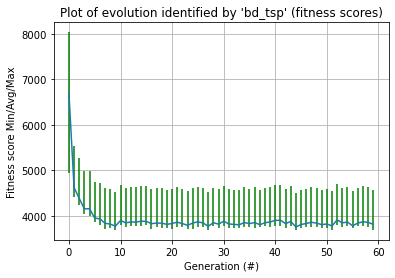

In [86]:
%run C:\Users\alecb\.conda\envs\mlg_ga\Scripts\pyevolve_graph.py -i bd_tsp -2

Pyevolve 0.6 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
60 generations found !


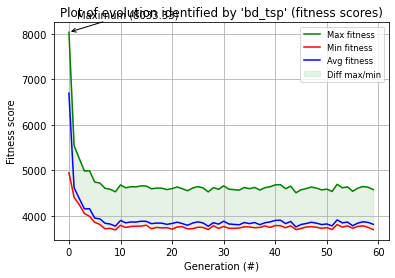

In [87]:
%run C:\Users\alecb\.conda\envs\mlg_ga\Scripts\pyevolve_graph.py -i bd_tsp -4

Pyevolve 0.6 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
60 generations found !


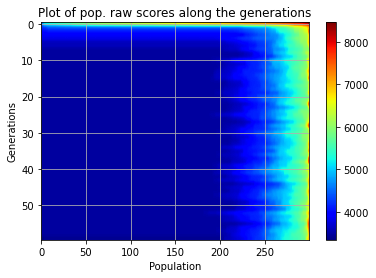

In [88]:
%run C:\Users\alecb\.conda\envs\mlg_ga\Scripts\pyevolve_graph.py -i bd_tsp -8